In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
from matplotlib_venn import venn3

## Violin Plots

In [3]:
sc_symm = pd.read_excel("ApoE spear-crescent symmetry.xlsx")
pi = pd.read_excel("Prelim Other pie chart data 2.xlsx")
rk = pd.read_excel("prelim ApoE ring-kbell.xlsx")
sc_log = pd.read_excel("prelim ApoE spear-crescent log angle.xlsx")
footnotes = pd.read_excel("ApoE footnote data.xlsx", "footnotes percentage")


In [10]:
sc_symm = sc_symm.drop(["22-18.1 BN", "22-18.1 ZM"], axis = 1)

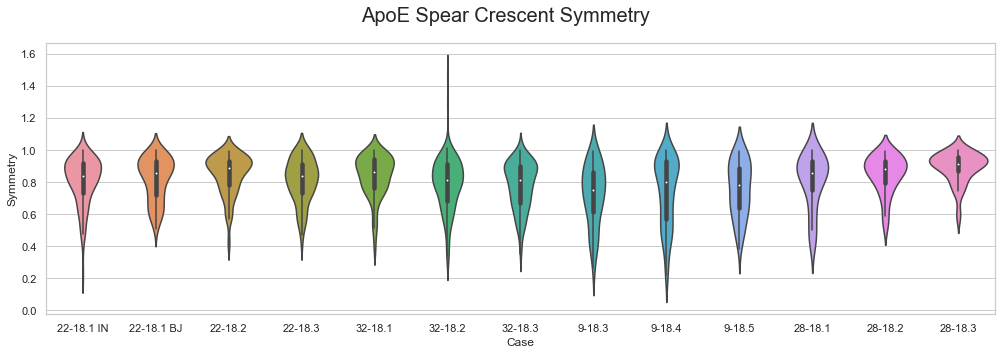

In [37]:
sns.set(style = "whitegrid")
symm = sns.violinplot(data = sc_symm)
symm.set_xlabel("Case")
symm.set_ylabel("Symmetry")
fig = symm.get_figure()
fig.set_size_inches(17, 5)
fig.suptitle('ApoE Spear Crescent Symmetry', fontsize = 20)
fig.show()
fig.savefig("ApoE S-C Symm.png")


In [23]:
sc_log = sc_log.drop(["22-18.1 BN", "22-18.1 ZM"], axis = 1)

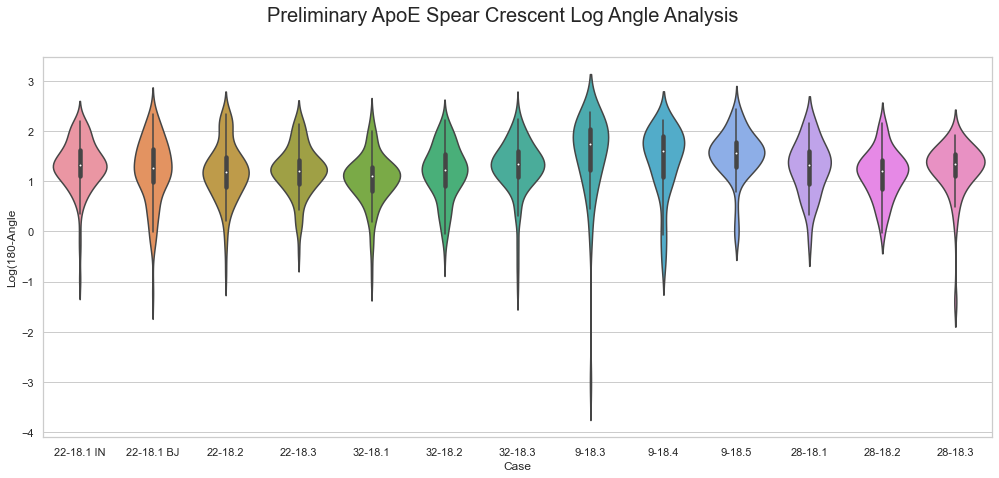

In [35]:
sns.set(style = "whitegrid")
symm = sns.violinplot(data = sc_log)
symm.set_xlabel("Case")
symm.set_ylabel("Log(180-Angle")
fig = symm.get_figure()
fig.set_size_inches(17, 7)
fig.suptitle('Preliminary ApoE Spear Crescent Log Angle Analysis', fontsize = 20)
fig.savefig("Prelim ApoE S-C Log-Angle.png")


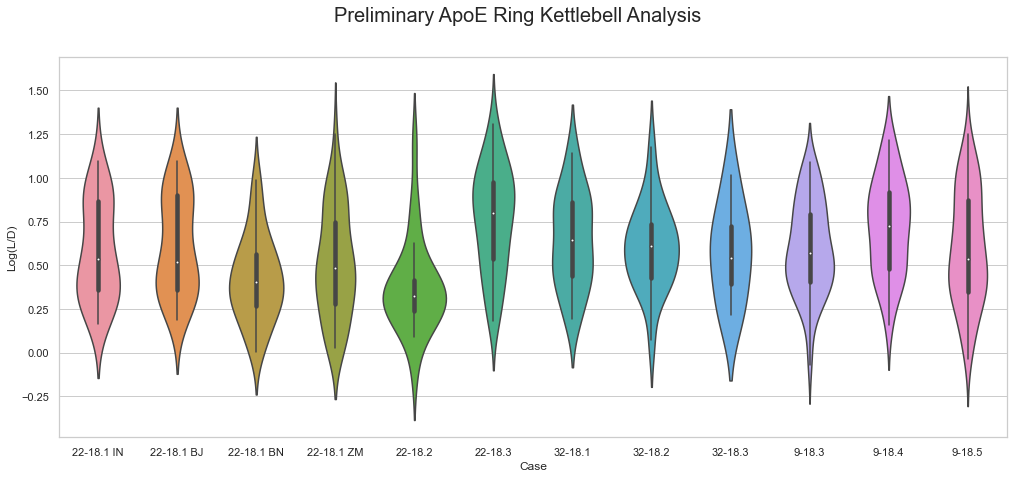

In [36]:
sns.set(style = "whitegrid")
symm = sns.violinplot(data = rk)
symm.set_xlabel("Case")
symm.set_ylabel("Log(L/D)")
fig = symm.get_figure()
fig.set_size_inches(17, 7)
fig.suptitle('Preliminary ApoE Ring Kettlebell Analysis', fontsize = 20)
fig.show()
fig.savefig("Prelim ApoE R-K.png")


## Pie Charts


In [4]:
pi = pi.reindex([0,1,2,5,6,9,7,8,3,4,10,11])

In [5]:
pie_labels = ["Drops", "Spears", "Green Spears", "Crescents", "Rings", "Kettlebells", "Saturns", "Oreos", "Rods", "Green Rods", "Multiple Inclusion-Speck", "Multiple Inclusion-Spear"]


In [6]:
pi = pi.set_index("morphology")

In [7]:
colors = ["steelblue", "dodgerblue", "deepskyblue", "skyblue", "cyan", "lightcyan", "darkorange", "gold", "darkgreen", "seagreen", "limegreen", "palegreen"]

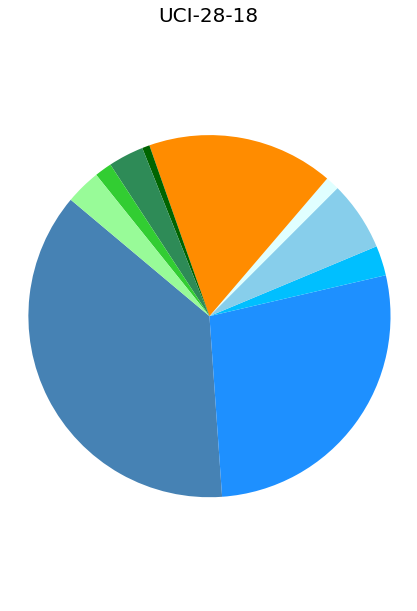

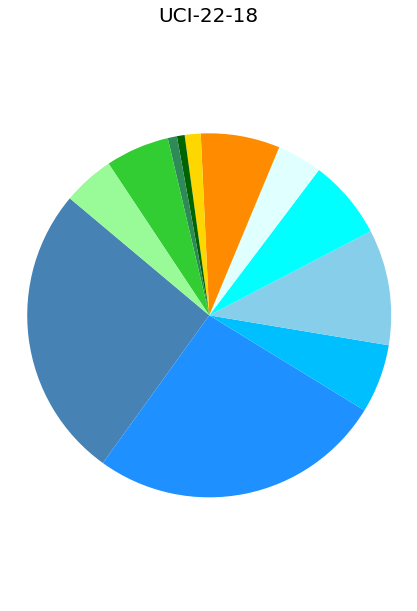

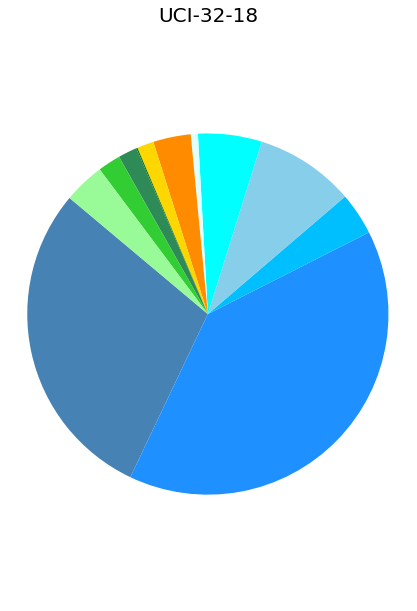

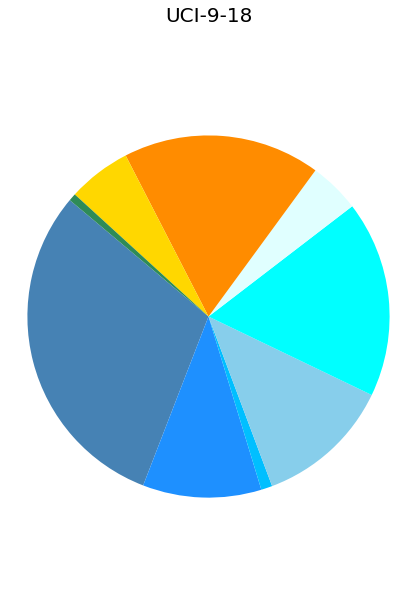

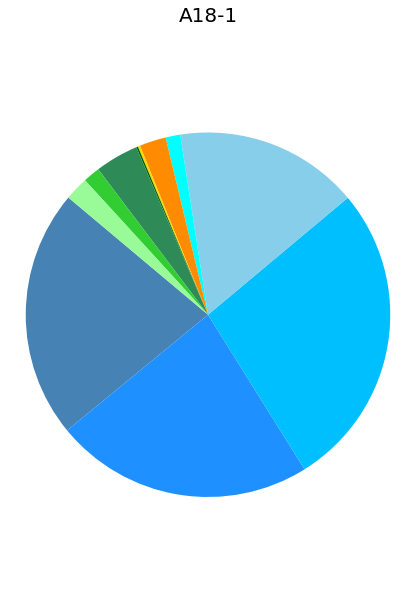

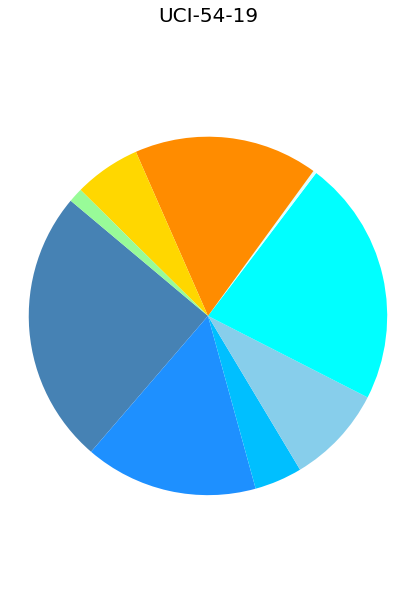

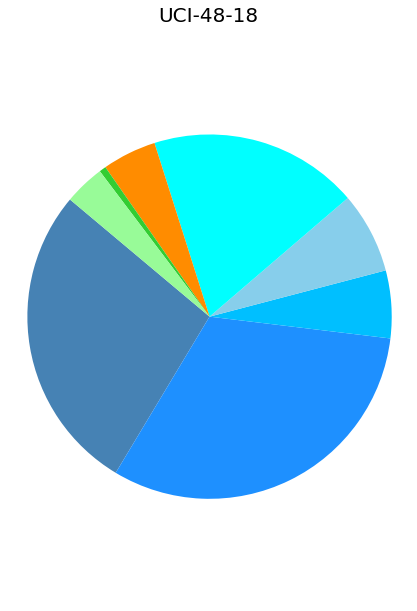

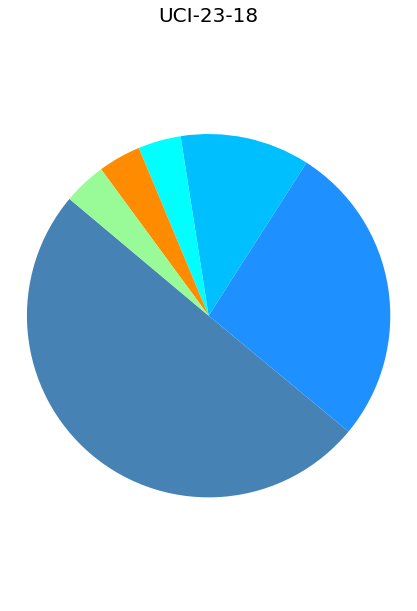

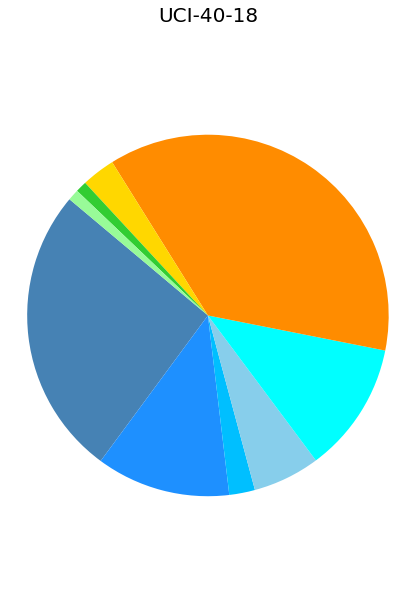

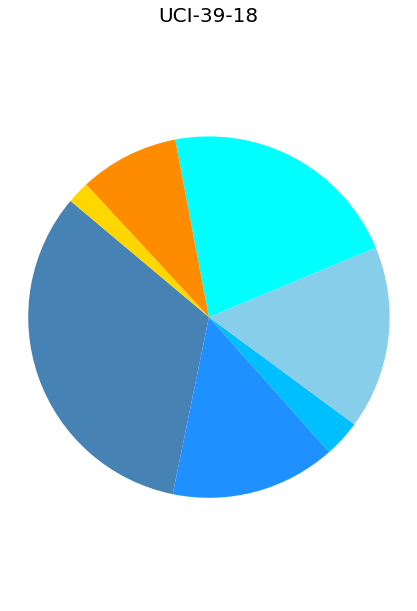

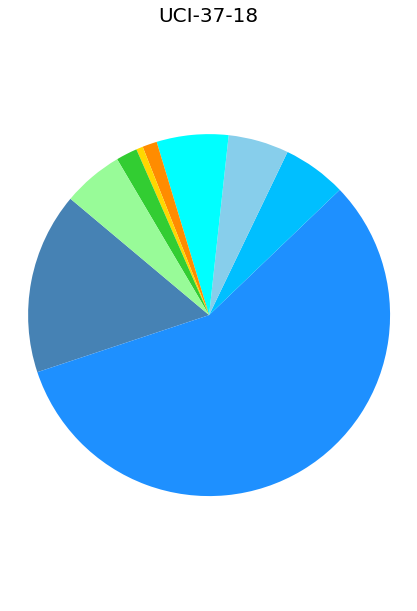

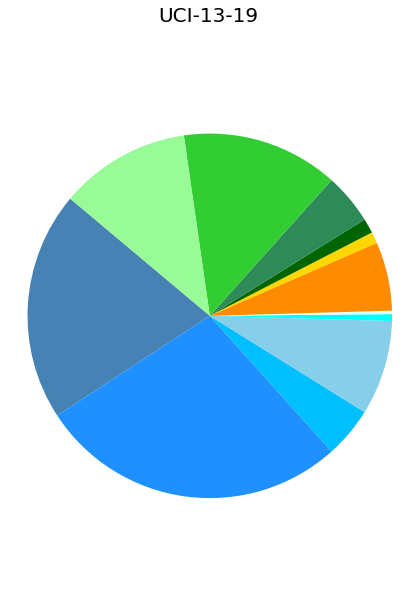

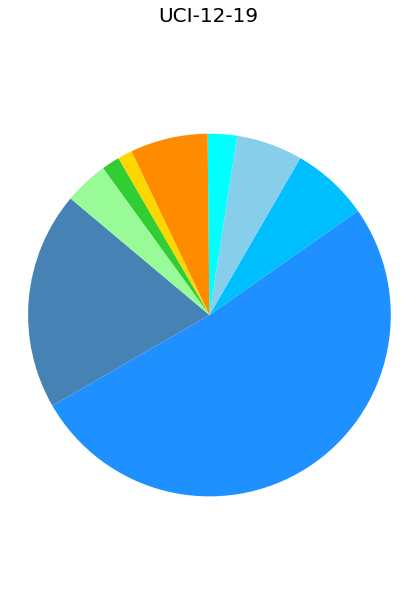

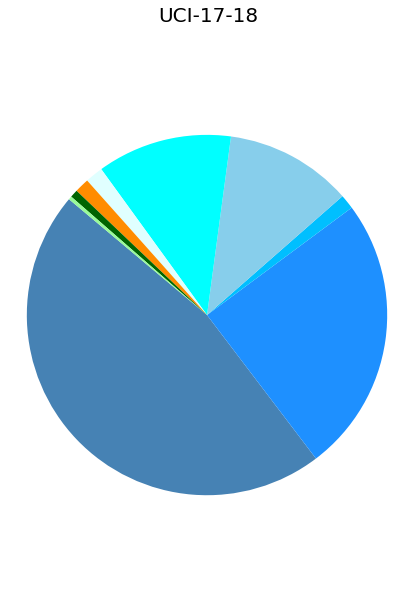

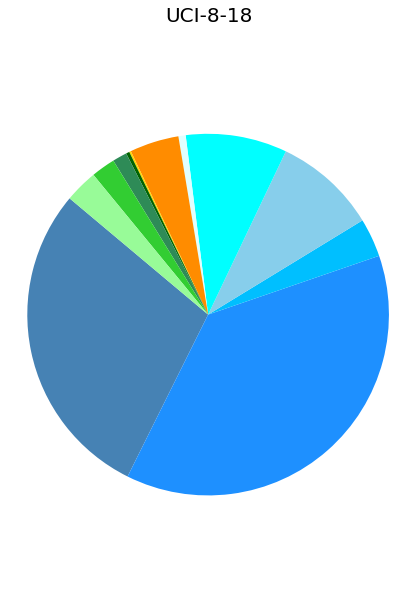

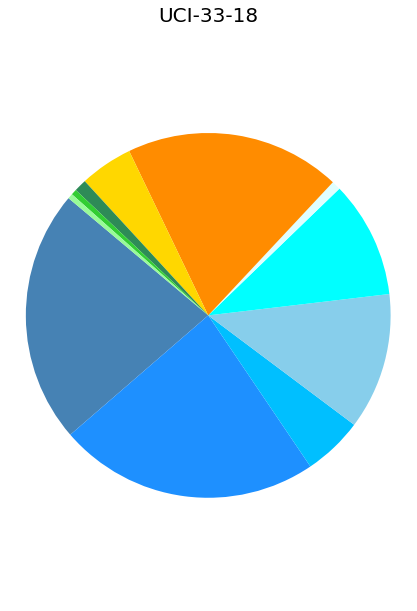

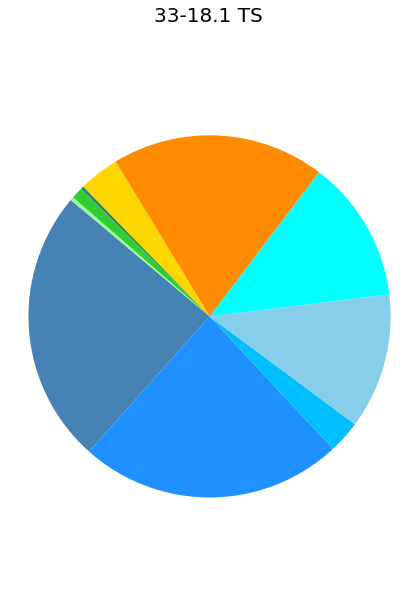

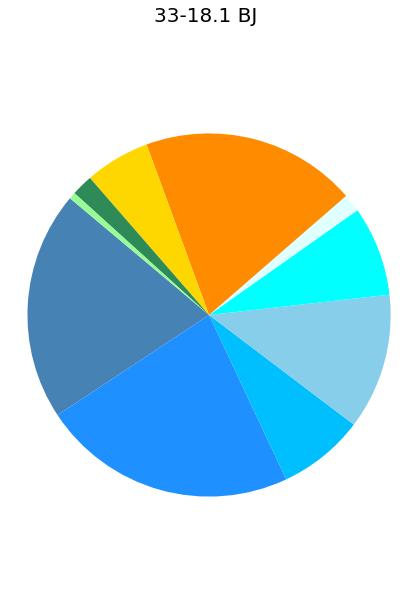

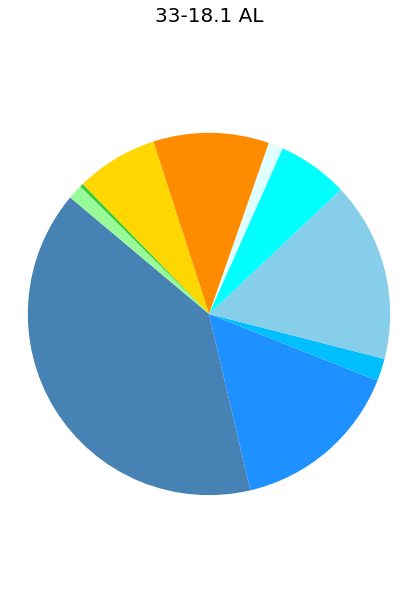

In [8]:
for label, content in pi.iteritems():
    fig1, ax1 = plt.subplots(figsize = (8, 8))
    fig1.subplots_adjust(.3, 0, 1, 1)
    sizes = content

    wedges, labels = ax1.pie(sizes, startangle = 140, radius = 1, colors = colors)
    ax1.axis("equal")

    ax1.set_title(label, fontsize = 20)
    plt.setp(labels, fontsize = 18)

    total = sum(sizes)
    # plt.legend(loc = "upper left", labels = pie_labels, prop = {"size": 23}, bbox_to_anchor = (0.0, 1), bbox_transform = fig1.transFigure)

    
    name = str(label)+"-chart.png"
    name.replace("/", "")
    plt.savefig(name, transparent = False)

## Scaled Venn Diagrams

In [25]:
footnotes = footnotes.set_index("footnote")
footnotes = footnotes.drop(["plain", "GR total", "MP total", "MAF total"])
footnotes = footnotes.drop(footnotes.index[7])
footnotes = footnotes.reindex(["GR only", "MAF only", "GR+MAF only", "MP only", "GR+MP only", "MAF+MP only", "GR+MAF+MP"])
footnotes = footnotes.round(decimals = 3)

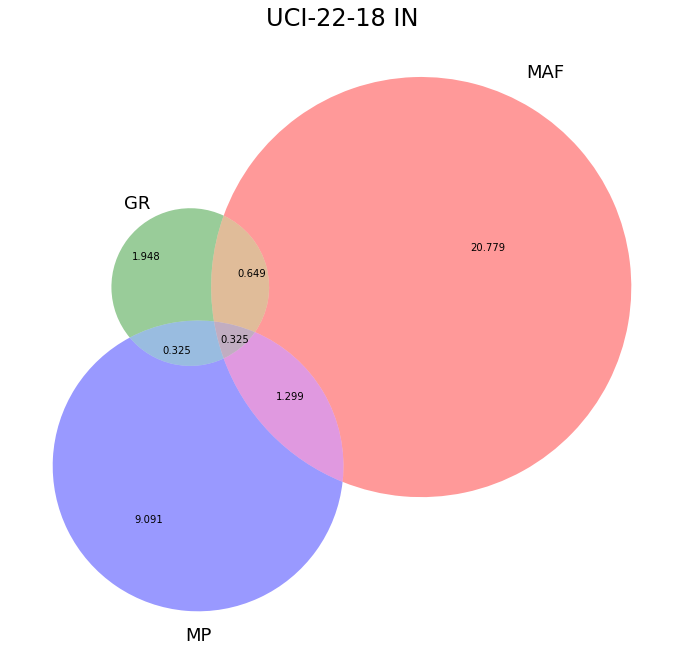

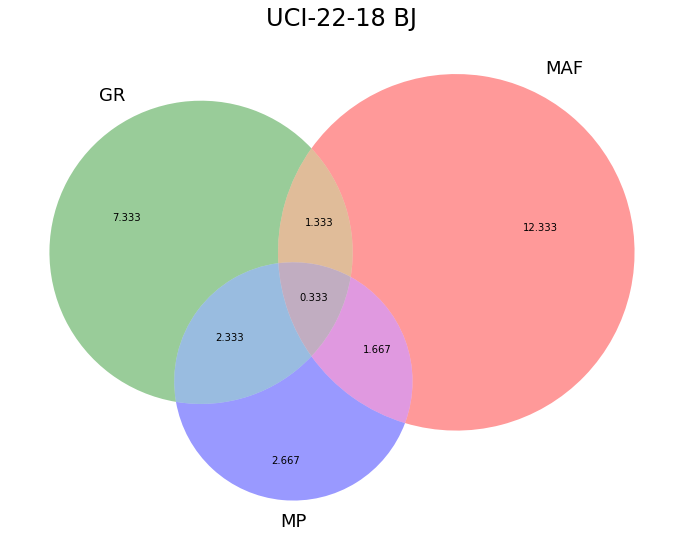

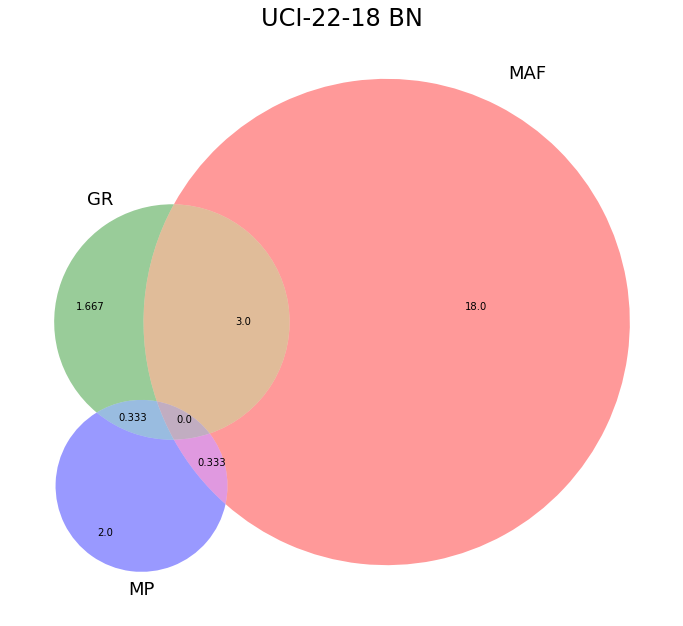

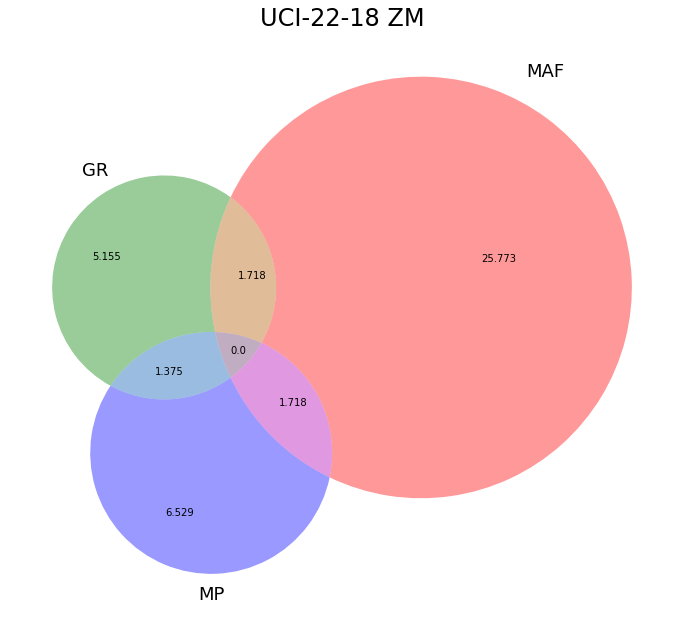

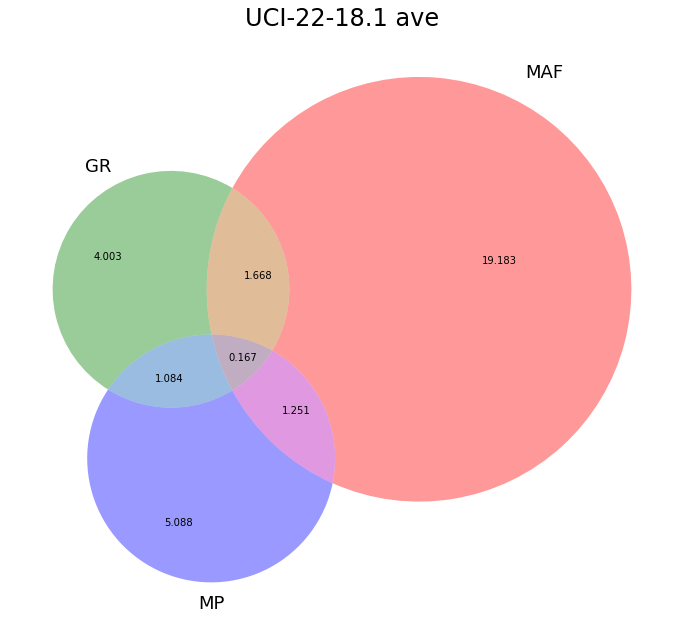

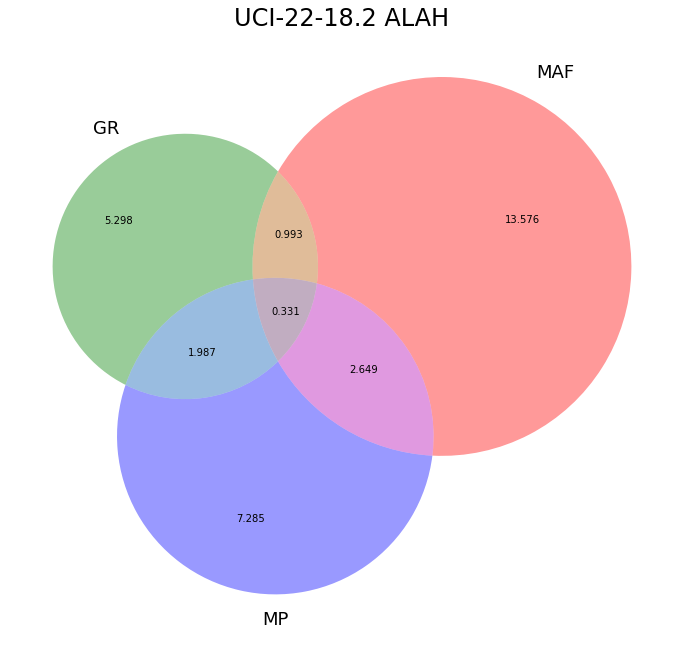

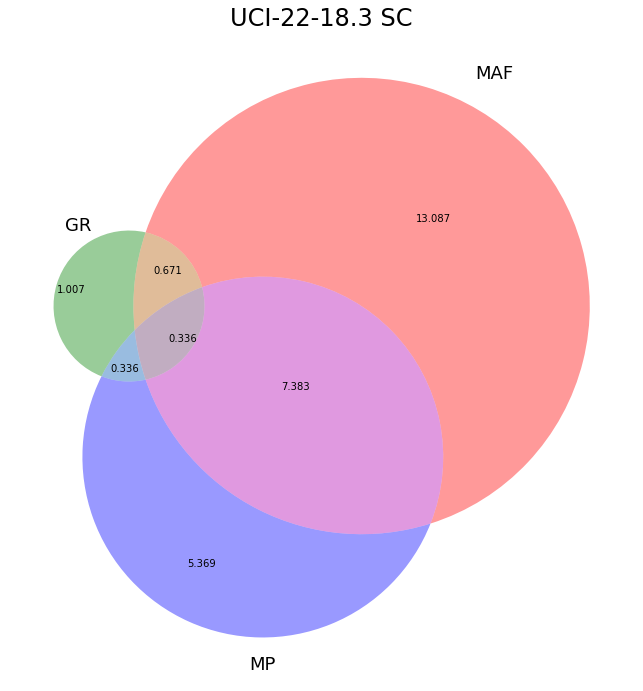

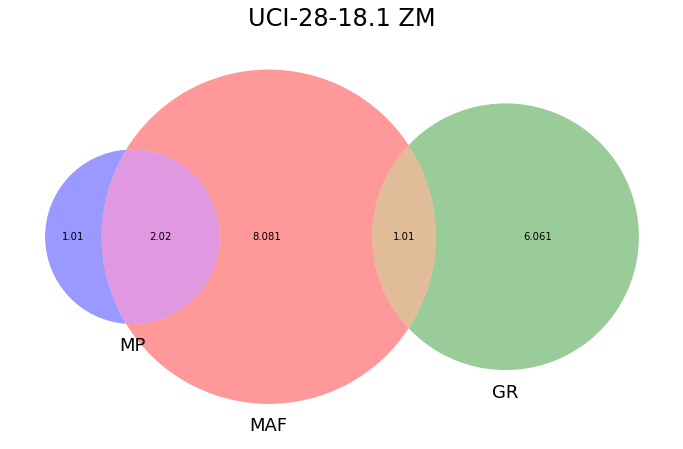

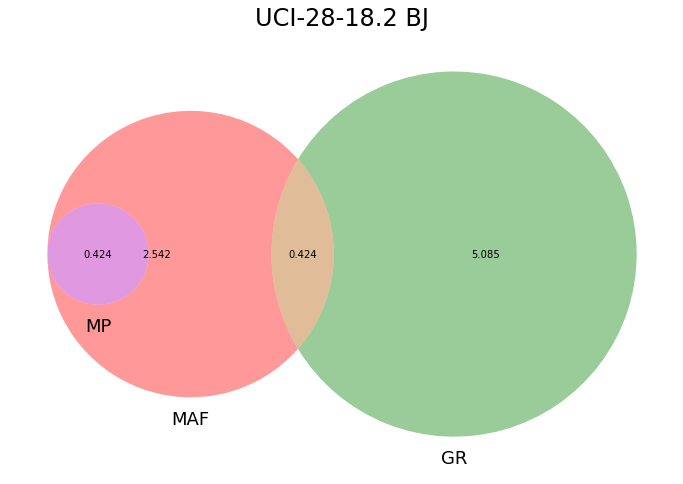

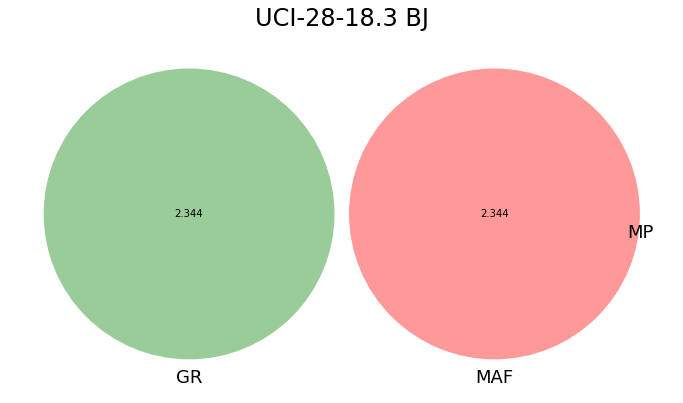

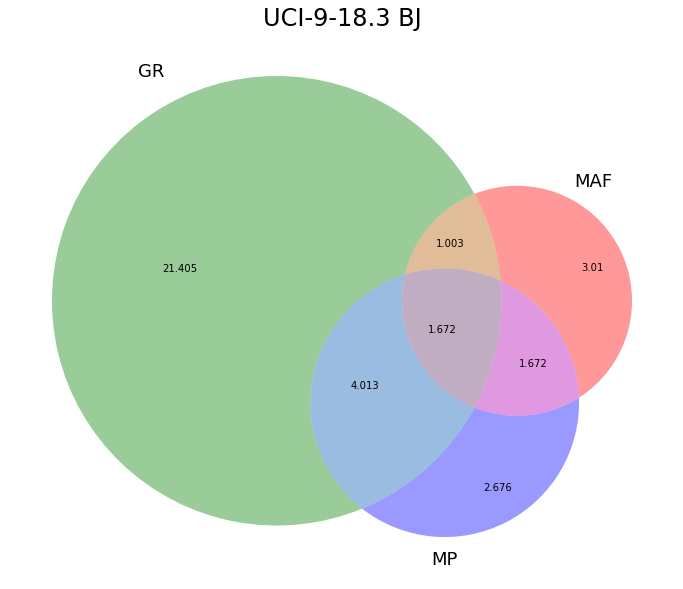

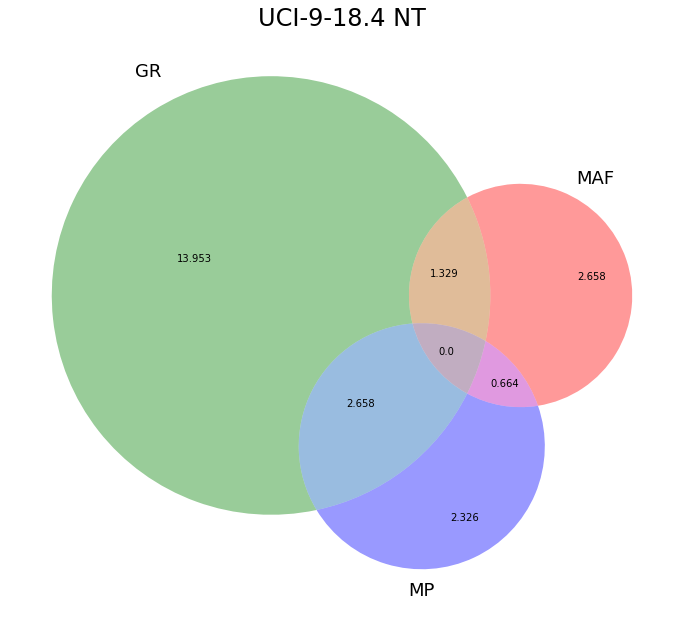

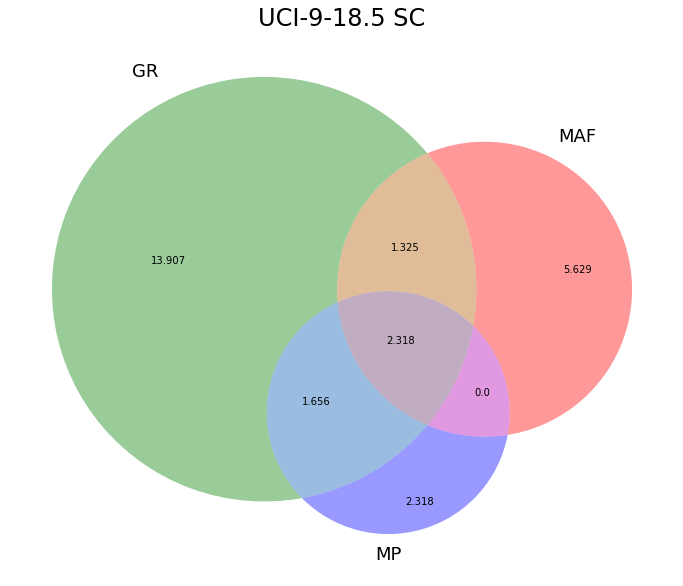

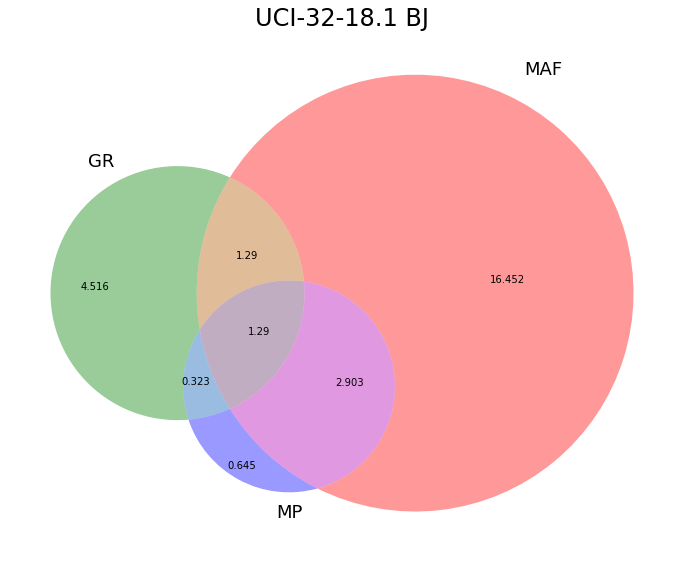

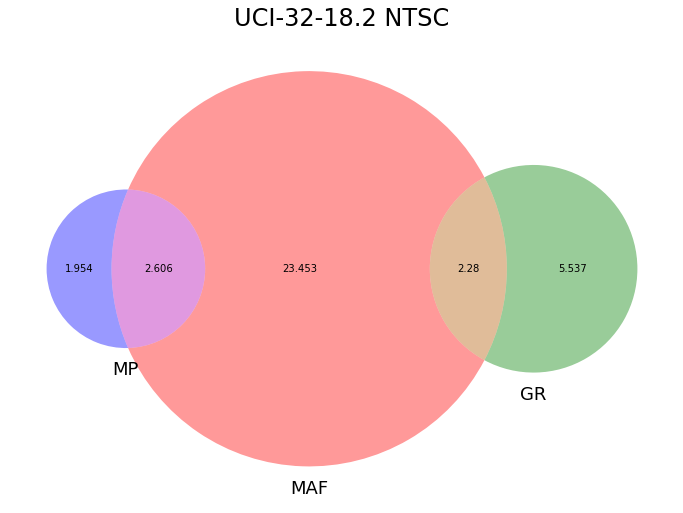

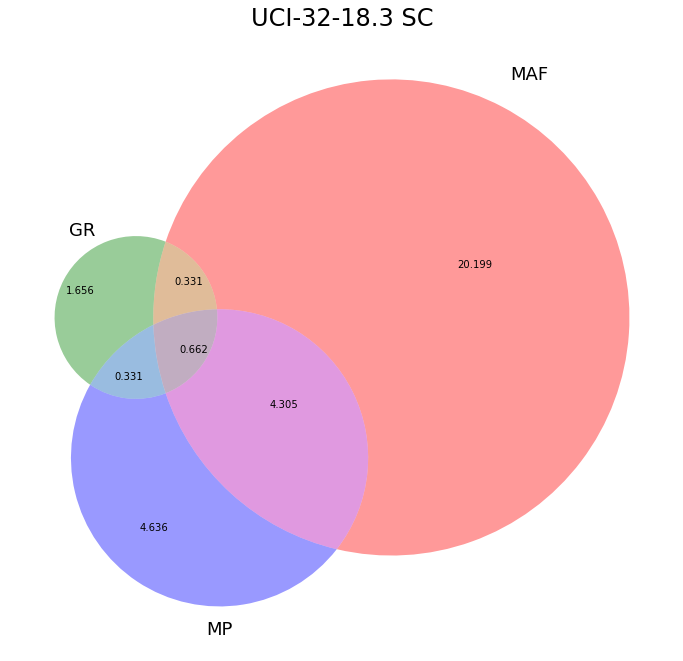

In [51]:
for label, content in footnotes.iteritems():
    plt.figure(figsize = (12, 12))
    ax = plt.gca()
    v =  venn3(subsets = content, set_labels = ("GR", "MAF", "MP"), ax = ax, set_colors = ("g", "r", "b"))
    for text in v.set_labels:
        text.set_fontsize(18)
        plt.title(label, fontsize = 24)
    name = str(label)+"-vennchart.png"
    name.replace("//", "")
    plt.savefig(name, transparent = False)
    plt.show()

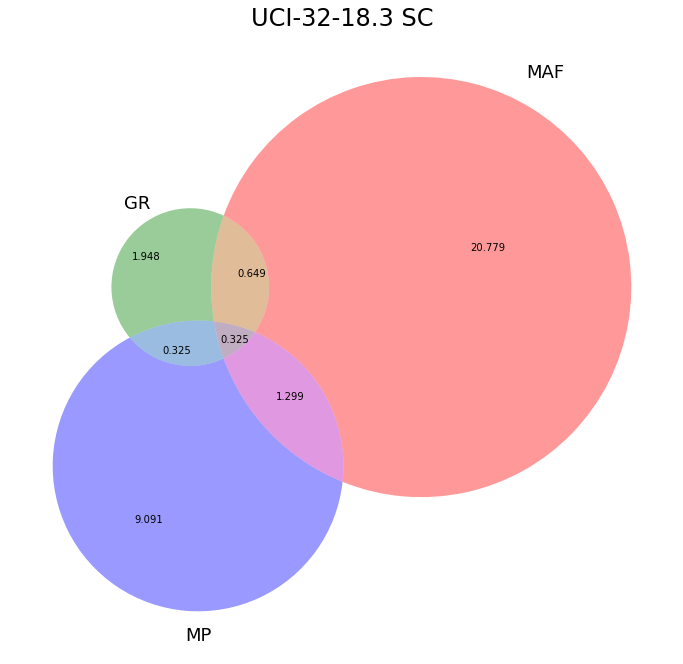

In [48]:
plt.figure(figsize = (12, 12))
ax = plt.gca()
v =  venn3(subsets = footnotes["UCI-22-18 IN"], set_labels = ("GR", "MAF", "MP"), ax = ax, set_colors = ("g", "r", "b"))
for text in v.set_labels:
    text.set_fontsize(18)
    plt.title(label, fontsize = 24)

plt.show()